In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from nearestPD import nearestPD


ds_2 = xr.open_dataset("data/regions_verify_202104_cov.nc")
bio_2 = ds_2["covariance_bio"]
anth_2 = ds_2["covariance_anth"]

M = bio_2
# determine threshold
thresh = 10**(-8)

# new thresholded matrix
M0 = np.where(abs(M) < thresh, 0, M)

# nearest non-singular to M0

M0pd = nearestPD(M0)

# %timeit np.linalg.inv(M0)
# %timeit np.linalg.inv(M)



Visual check
* where the non-zero elements of the matrix are after setting the threshold
* nearest nonsingular 

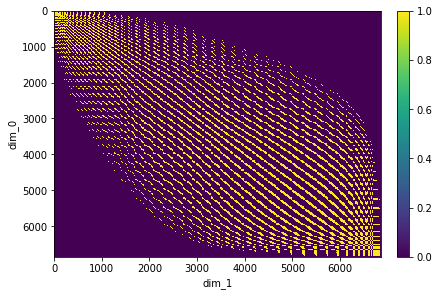

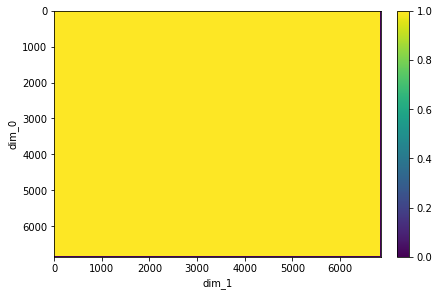

In [4]:


M0 = xr.DataArray(M0)
M0_binary = np.where(M0 != 0, 1, M0)
M0_binary = xr.DataArray(M0_binary)
M0pd_binary = np.where(M0pd != 0, 1, M0pd)
M0pd_binary = xr.DataArray(M0pd_binary)


fig, ax = plt.subplots(layout= 'constrained')
M0_binary.plot.pcolormesh(yincrease = False)

fig, ax = plt.subplots(layout = 'constrained')
M0pd_binary.plot.pcolormesh(yincrease = False)



